## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## IMPORTING DATASET

In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

## DATA CLEANING

In [3]:
df.head()

# WE CAM ALREADY SEE THAT THERE IS A LOT OF NULL VAUES IN THE COLUMNS

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# THE NUMBER OF NULL VALUES IN THE COLUMNS

df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [5]:
# Dropping all the null values from the dataset

df.dropna(inplace=True)

In [6]:
# Replacing abbreviated values of 'Type' column
xr = []
for i in df['Type']:
    if i == 'h':
        xr.append('House')
    elif i == 't':
        xr.append('Townhouse')
    elif i == 'u':
        xr.append('Duplex')
df['Type'] = xr

## CLUSTERING OF DATA

In [7]:
# Making a copy of the dataframe and dropping the price column

df_copy = df.copy()

In [8]:
from sklearn import preprocessing

# Clustering based on the following parameters
df_imp = df_copy[['Rooms','Distance','YearBuilt']]

# df_imp=df_copy[['Propertycount', 'Rooms']]

# df_imp=df_copy[['Distance', 'Propertycount']]


x = df_imp
min_max_scalar = preprocessing.MinMaxScaler()
x_scaled = min_max_scalar.fit_transform(x)

scaledX = pd.DataFrame(x_scaled)

In [9]:
scaledX

,0,1,2
0,0.090909,0.052743,0.855407
1,0.181818,0.052743,0.855407
2,0.272727,0.052743,0.993925
3,0.181818,0.052743,0.867558
4,0.090909,0.052743,0.843256
...,...,...,...
8882,0.181818,0.537975,0.996355
8883,0.181818,0.537975,0.991495
8884,0.090909,0.132911,0.998785
8885,0.090909,0.132911,0.976914


In [10]:
# Choosing optimal k

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt



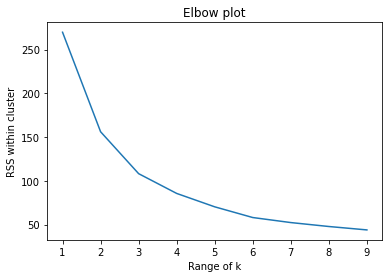

In [11]:
k_range = range(1, 10)

k_means_var = [KMeans(n_clusters= k).fit(scaledX) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

k_euclid = [cdist(scaledX, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# # Calculate within cluster sum of squares

wcss = [sum(d**2) for d in dist]

# # Visualizing the elbow method for determining k

plt.plot(k_range, wcss)
plt.xlabel('Range of k')
plt.ylabel('RSS within cluster')
plt.title('Elbow plot')
plt.show()


In [12]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaledX)
labels = kmeans.labels_
# #Glue back to originaal data
df['clusters'] = labels
df2 = df.rename(columns = {0 : 'Lattitude', 1: 'Longtitude'})

C:\Users\tahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


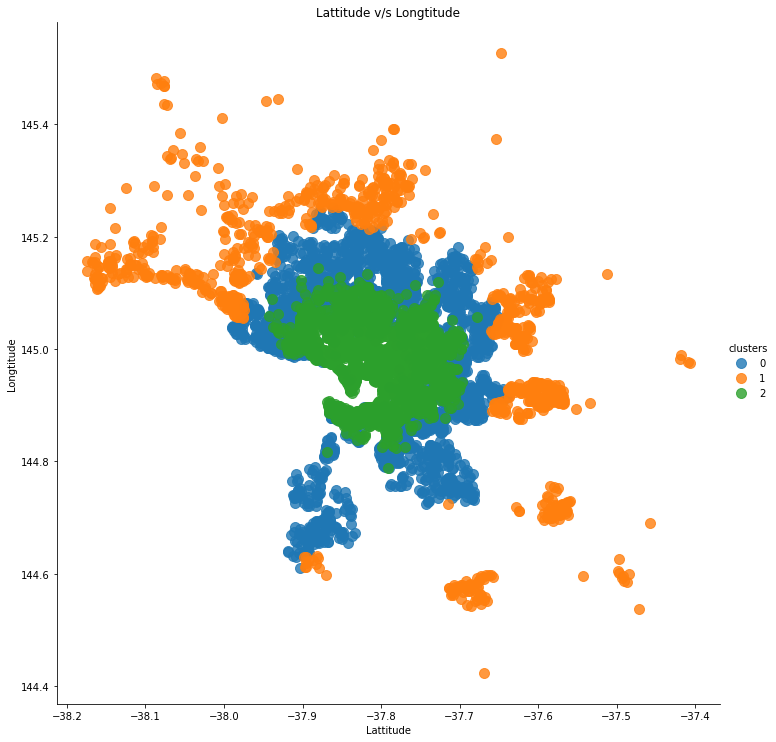

In [13]:
sns.lmplot('Lattitude', 'Longtitude', data = df2, fit_reg=False,hue="clusters",  scatter_kws={"marker": "D", "s": 100}, height= 10)
plt.title('Lattitude v/s Longtitude')
plt.xlabel('Lattitude')
plt.ylabel('Longtitude')

plt.show()

In [14]:
cluster_0 = df[df["clusters"] == 0]
cluster_1 = df[df["clusters"] == 1]
cluster_2 = df[df["clusters"] == 2]


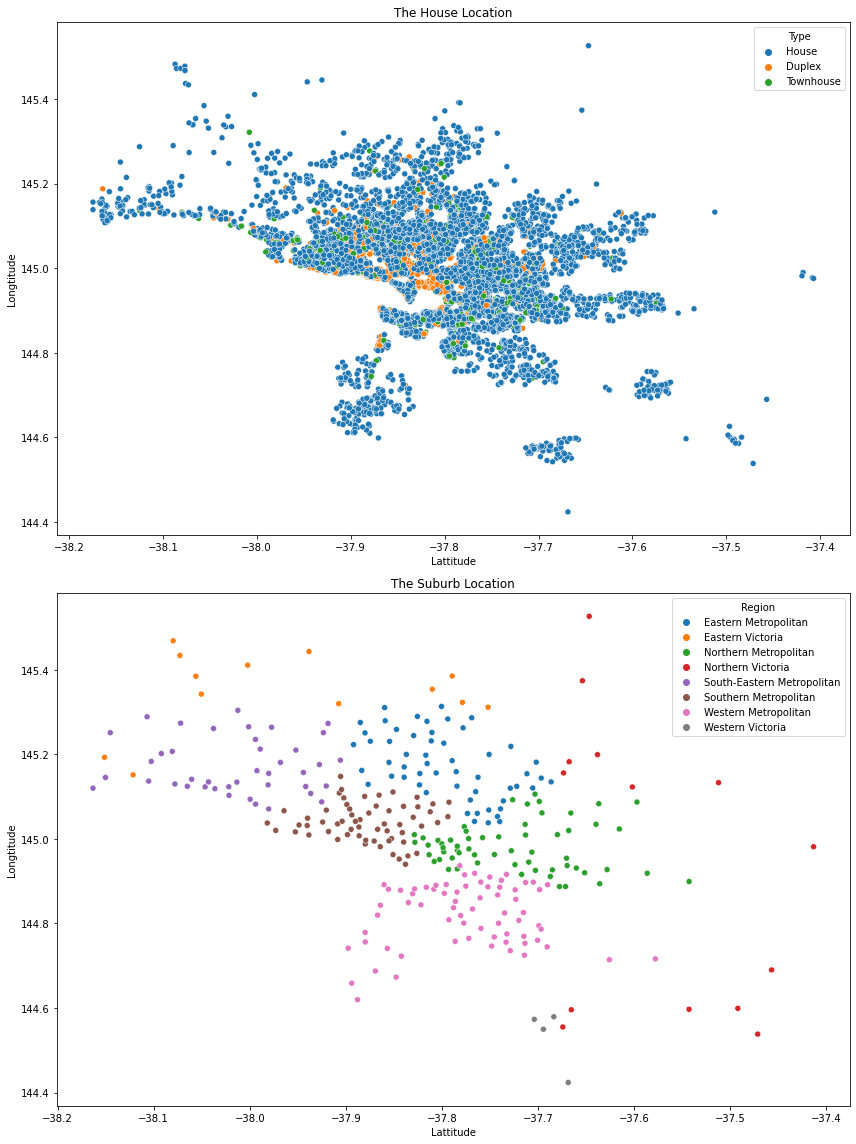

In [15]:
dl = df[['Regionname', 'Suburb', 'Price', 'Lattitude', 'Longtitude']].groupby(by=['Regionname', 'Suburb']).mean()
dl_region = [i for i, j in dl.index]
dl_suburb = [j for i, j in dl.index]

dl['Region'] = dl_region
dl['Suburb'] = dl_suburb
dl = dl.reset_index(drop=True)

fig, ax = plt.subplots(2, 1, figsize=(12, 16))
sns.scatterplot(data=df, x='Lattitude', y='Longtitude', hue='Type', ax=ax[0])
ax[0].set_title('The House Location')
sns.scatterplot(data=dl, x='Lattitude', y='Longtitude', hue='Region', ax=ax[1])
ax[1].set_title('The Suburb Location')
plt.tight_layout()

In [16]:
# REGRESSION ANALYSIS FOR CLUSTER 0

X_0 = cluster_0[['Distance','Bathroom','Bedroom2']]
y_0 = cluster_0['Price']


In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.2, random_state = 0)


regr = linear_model.LinearRegression()
regr.fit(X_train_0,y_train_0)
print("Cluster 0 Intercept : " + str(regr.intercept_))
print("Cluster 0 Coefficients : " + str(regr.coef_))


Cluster 0 Intercept : 1025520.9400826431
Cluster 0 Coefficients : [-79756.89682905 285278.34097681 184250.21332136]


In [18]:
y_pred_0 = regr.predict(X_test_0)


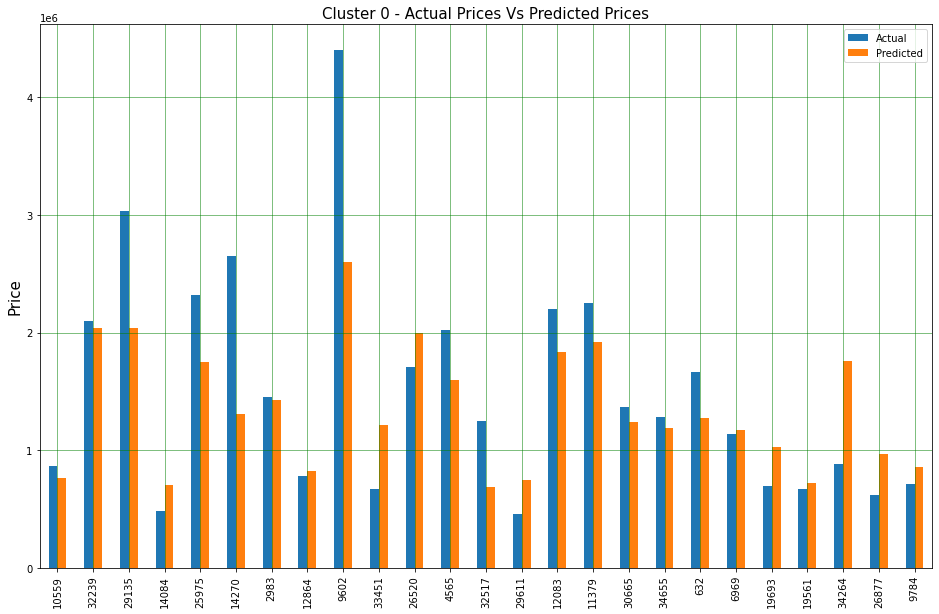

In [19]:
act_v_pred = pd.DataFrame({'Actual': y_test_0, 'Predicted': y_pred_0})
act_pred_sample = act_v_pred.head(25)
act_pred_sample.plot(kind = 'bar', figsize = (16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Cluster 0 - Actual Prices Vs Predicted Prices", size = 15)
plt.ylabel("Price", size = 15)
plt.show()



In [20]:
# REGRESSION FOR CLUSTER 1

X_1 = cluster_1[['Distance','Bathroom','Bedroom2']]
y_1 = cluster_1['Price']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 0)


regr = linear_model.LinearRegression()
regr.fit(X_train_1,y_train_1)
print("Cluster 1 Intercept : " + str(regr.intercept_))
print("Cluster 1 Coefficients : " + str(regr.coef_))

Cluster 1 Intercept : 500173.99979463115
Cluster 1 Coefficients : [-7972.36790408 91985.23968353 77829.40901962]


In [21]:
y_pred_1 = regr.predict(X_test_1)

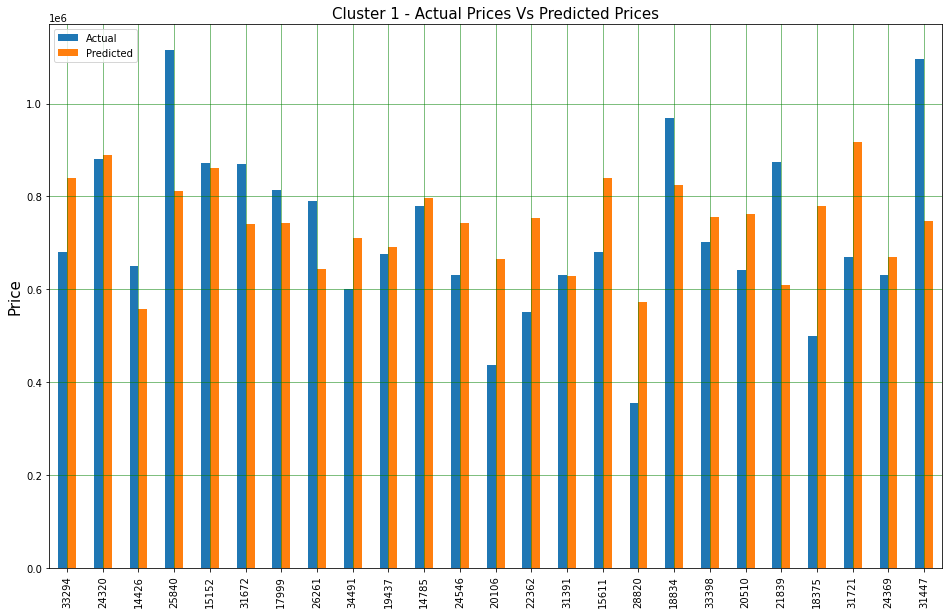

In [22]:
act_v_pred = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
act_pred_sample = act_v_pred.head(25)
act_pred_sample.plot(kind = 'bar', figsize = (16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Cluster 1 - Actual Prices Vs Predicted Prices", size = 15)
plt.ylabel("Price", size = 15)
plt.show()


In [23]:
# REGRESSION FOR CLUSTER 2

X_2 = cluster_2[['Distance','Bathroom','Bedroom2']]
y_2 = cluster_2['Price']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 0)


regr = linear_model.LinearRegression()
regr.fit(X_train_2,y_train_2)
print("Cluster 2 Intercept : " + str(regr.intercept_))
print("Cluster 2 Coefficients : " + str(regr.coef_))


Cluster 2 Intercept : -144495.03348981217
Cluster 2 Coefficients : [-33276.66322876 229804.09025786 443523.59619331]


In [24]:
y_pred_2 = regr.predict(X_test_2)

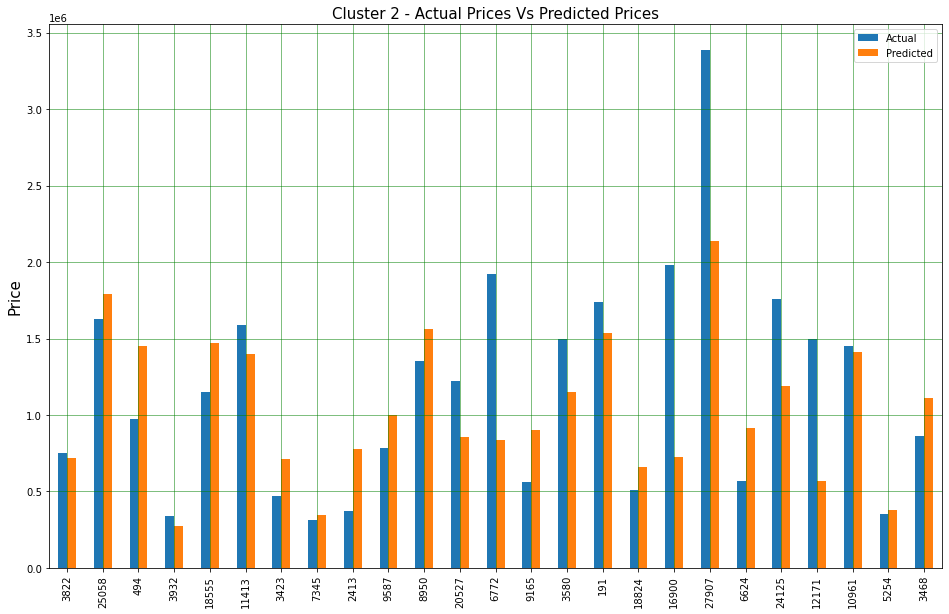

In [25]:
act_v_pred = pd.DataFrame({'Actual': y_test_2, 'Predicted': y_pred_2})
act_pred_sample = act_v_pred.head(25)
act_pred_sample.plot(kind = 'bar', figsize = (16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Cluster 2 - Actual Prices Vs Predicted Prices", size = 15)
plt.ylabel("Price", size = 15)
plt.show()
